### FASTA/TEXT TUTORIAL FOR DNA ANALYSER IBP

### 1. INSTALLATION + LOGIN

In [ ]:
!pip install dna-analyser-ibp 

In [1]:
from DNA_analyser_IBP import Api # USE TAB FOR HINTS 

In [2]:
API = Api() # create API variable and login 

Enter your email	patrikkaura@gmail.com
Enter your password	········
User patrikkaura@gmail.com logged in: 2019-06-28 16:26:48.328692


In [3]:
# if error occured in login then run RESTART KERNEL or reopen collab file
# in google collab -> RUNTIME -> RESTART RUNTIME

### 2. CONNECT TO GDRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 3. ANALYSE FASTA FILES

In [17]:
import glob # you have to get list of all files for analyse

# on gdrive you use path like /content/drive/My Drive/{folder_path}

# you use *.fasta or *.txt to tell glob function to find all fasta files in folder
FASTA_FILES = glob.glob('/home/sephyx/Git/DNA_analyser_IBP/example/*.txt')                        
FASTA_FILES # to print files

['/home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_3.txt',
 '/home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_2.txt',
 '/home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_1.txt',
 '/home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_4.txt']

In [18]:
import os # to print name of file use

os.path.basename(FASTA_FILES[0])

'Saccharomyces_cerevisiae_S288C_chromosome_3.txt'

In [19]:
# you iterate through list of FASTA files
# as name you user command os.path.basename, as format you can use FASTA or PLAIN for text files

for path in FASTA_FILES: 
    # and send it into website
    API.sequence.file_creator(circular=True, file_path=path, 
                              sequence_type='DNA', 
                              format='PLAIN',
                              name=os.path.basename(path),
                              tags=['projekt01'])

Sequence Saccharomyces_cerevisiae_S288C_chromosome_3.txt uploading: 100 % uploaded [00:01, 125.20 % uploaded/s]
Sequence Saccharomyces_cerevisiae_S288C_chromosome_2.txt uploading: 100 % uploaded [00:01, 130.40 % uploaded/s]
Sequence Saccharomyces_cerevisiae_S288C_chromosome_1.txt uploading: 100 % uploaded [00:01, 80.72 % uploaded/s]
Sequence Saccharomyces_cerevisiae_S288C_chromosome_4.txt uploading: 100 % uploaded [00:02, 44.43 % uploaded/s]


In [20]:
# to print uploaded sequences use
API.sequence.load_all(filter_tag=['projekt01'])

,id,name,created,type,circular,length,ncbi,tags,fasta_comment,nucleic_count
0,5d618335-ebc4-4730-b5a1-a112f15a77bb,Saccharomyces_cerevisiae_S288C_chromosome_3.txt,2019-06-28T16:29:49.371+0000,DNA,True,230218,None,projekt01,None,"{'C': 44641, 'G': 45766, 'T': 69975, 'A': 69836}"
1,aedb264f-9515-4916-87ca-d7f3e52eb973,Saccharomyces_cerevisiae_S288C_chromosome_2.txt,2019-06-28T16:29:50.509+0000,DNA,True,230218,None,projekt01,None,"{'C': 44641, 'G': 45766, 'T': 69975, 'A': 69836}"
2,79ad027c-6d35-4c9c-bb13-f09932e50499,Saccharomyces_cerevisiae_S288C_chromosome_1.txt,2019-06-28T16:29:51.650+0000,DNA,True,230218,None,projekt01,None,"{'C': 44641, 'G': 45766, 'T': 69975, 'A': 69836}"
3,4ebb6c24-f513-4a5f-93ef-d3faf03804ec,Saccharomyces_cerevisiae_S288C_chromosome_4.txt,2019-06-28T16:29:52.886+0000,DNA,True,230218,None,projekt01,None,"{'C': 44641, 'G': 45766, 'T': 69975, 'A': 69836}"


In [21]:
# now save the previous table into variable like this
SEQUENCES = API.sequence.load_all(filter_tag=['projekt01'])

In [23]:
# last step is to analyze them
API.g4hunter.analyse_creator(sequence=SEQUENCES, tags=['projekt01'], window_size=25, threshold=1.2)

Analyse Saccharomyces_cerevisiae_S288C_chromosome_3.txt processing: 100 % processed [00:02, 69.51 % processed/s]
Analyse Saccharomyces_cerevisiae_S288C_chromosome_2.txt processing: 100 % processed [00:02, 46.09 % processed/s]
Analyse Saccharomyces_cerevisiae_S288C_chromosome_1.txt processing: 100 % processed [00:02, 46.86 % processed/s]
Analyse Saccharomyces_cerevisiae_S288C_chromosome_4.txt processing: 100 % processed [00:02, 46.79 % processed/s]


In [24]:
#to show results
API.g4hunter.load_all(filter_tag=['projekt01'])

,id,created,tags,finished,title,sequence_id,result_count,window_size,threshold,frequency
0,4b971eb3-4914-4969-a41a-abe700b5514f,2019-06-28T16:30:24.689+0000,projekt01,2019-06-28T16:30:24.769+0000,Saccharomyces_cerevisiae_S288C_chromosome_3.txt,5d618335-ebc4-4730-b5a1-a112f15a77bb,87,25,1.2,0.377903
1,f256e80b-2b28-4bbc-b2ac-926a53dffdf7,2019-06-28T16:30:26.849+0000,projekt01,2019-06-28T16:30:26.931+0000,Saccharomyces_cerevisiae_S288C_chromosome_2.txt,aedb264f-9515-4916-87ca-d7f3e52eb973,87,25,1.2,0.377903
2,dd97c170-cb00-43d0-ada5-ac3889e3b9b3,2019-06-28T16:30:28.986+0000,projekt01,2019-06-28T16:30:29.071+0000,Saccharomyces_cerevisiae_S288C_chromosome_1.txt,79ad027c-6d35-4c9c-bb13-f09932e50499,87,25,1.2,0.377903
3,48b47b1e-2e13-4024-91f0-1a92d471a379,2019-06-28T16:30:31.111+0000,projekt01,2019-06-28T16:30:31.202+0000,Saccharomyces_cerevisiae_S288C_chromosome_4.txt,4ebb6c24-f513-4a5f-93ef-d3faf03804ec,87,25,1.2,0.377903


In [25]:
#every table you can also save into csv
API.g4hunter.load_all(filter_tag=['projekt01']).to_csv('/home/sephyx/Git/DNA_analyser_IBP/example/results.csv')

In [26]:
#if you want to see detailed result 
G4_RESULTS = API.g4hunter.load_all(filter_tag=['projekt01']) # 1. save table with results

#2. choose index of analyse you want to see for example 0 by adding iloc[0]
# G4_RESULTS = table .iloc[0] = ROW 0

API.g4hunter.load_results(g4hunter_analyse=G4_RESULTS.iloc[0]) 

,id,position,length,score,absScore,sequence,subScoreList
0,1,0,35,-1.200000,1.200000,CCACACCACACCCACACACCCACACACCACACCAC,"[-1.28, -1.2, -1.2, -1.28, -1.24, -1.28, -1.2,..."
1,2,26,25,-1.200000,1.200000,CCACACCACACACCACACCACACCC,[-1.2]
2,3,116,30,-1.033333,1.033333,ACTTACCCTCCATTACCCTGCCTCCACTCG,"[-1.2, -1.2, -1.2, -1.2, -1.24, -1.2]"
3,4,201,28,-1.142857,1.142857,CTACCACTCACCCACCGTTACCCTCCAA,"[-1.2, -1.24, -1.24, -1.24]"
4,5,209,28,-1.250000,1.250000,CACCCACCGTTACCCTCCAATTACCCAT,"[-1.28, -1.36, -1.36, -1.24]"
5,6,220,28,-1.285714,1.285714,ACCCTCCAATTACCCATATCCAACCCAC,"[-1.28, -1.4, -1.28, -1.2]"
6,7,239,25,-1.240000,1.240000,CCAACCCACTGCCACTTACCCTACC,[-1.24]
7,8,250,25,-1.240000,1.240000,CCACTTACCCTACCATTACCCTACC,[-1.24]
8,9,254,29,-1.172414,1.172414,TTACCCTACCATTACCCTACCATCCACCA,"[-1.2, -1.2, -1.28, -1.36, -1.24]"
9,10,1978,25,1.200000,1.200000,ACTGGGTAGGTTTCAGTTGGGTGGG,[1.2]


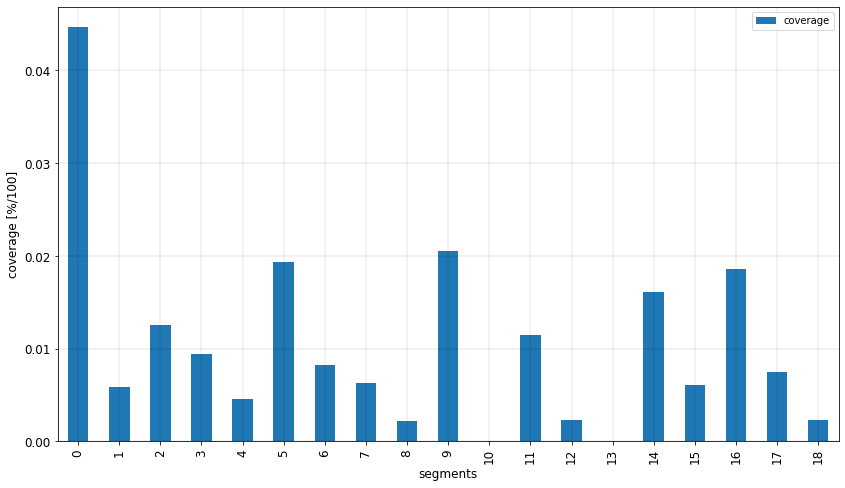

In [27]:
#to print heatmap of result for example also 0
API.g4hunter.load_heatmap(g4hunter_analyse=G4_RESULTS.iloc[0], segment_count=20, coverage=True)

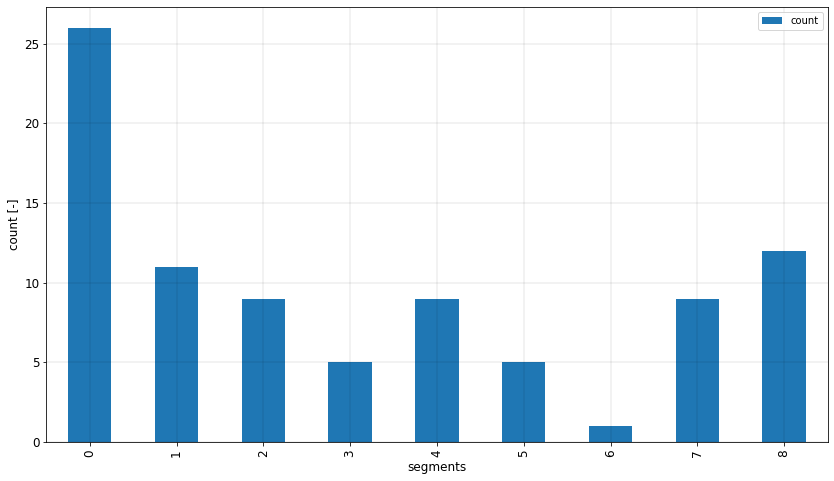

In [31]:
#you can also set different segment counts + change heatmap from coverage to count
API.g4hunter.load_heatmap(g4hunter_analyse=G4_RESULTS.iloc[0], segment_count=10, coverage=False)

In [32]:
#last step is to export results into csv
API.g4hunter.export_csv(g4hunter_analyse=G4_RESULTS, out_path='/home/sephyx/Git/DNA_analyser_IBP/example/')

file created -> /home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_3.txt_4b971eb3-4914-4969-a41a-abe700b5514f.csv
file created -> /home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_2.txt_f256e80b-2b28-4bbc-b2ac-926a53dffdf7.csv
file created -> /home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_1.txt_dd97c170-cb00-43d0-ada5-ac3889e3b9b3.csv
file created -> /home/sephyx/Git/DNA_analyser_IBP/example/Saccharomyces_cerevisiae_S288C_chromosome_4.txt_48b47b1e-2e13-4024-91f0-1a92d471a379.csv


In [33]:
#if you want to clean it
API.sequence.delete(sequence_dataframe=SEQUENCES) 

Sequence 5d618335-ebc4-4730-b5a1-a112f15a77bb was deleted
Sequence aedb264f-9515-4916-87ca-d7f3e52eb973 was deleted
Sequence 79ad027c-6d35-4c9c-bb13-f09932e50499 was deleted
Sequence 4ebb6c24-f513-4a5f-93ef-d3faf03804ec was deleted


In [34]:
API.g4hunter.delete(g4hunter_analyse=G4_RESULTS) 

G4hunter 4b971eb3-4914-4969-a41a-abe700b5514f was deleted
G4hunter f256e80b-2b28-4bbc-b2ac-926a53dffdf7 was deleted
G4hunter dd97c170-cb00-43d0-ada5-ac3889e3b9b3 was deleted
G4hunter 48b47b1e-2e13-4024-91f0-1a92d471a379 was deleted
